# Chapter 4 Graphene relatives
## 4. Bilayer graphene

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

Prepareing the function for BLG. $-t$ represents the intralayer hopping, while $\gamma$ represenst the interlayer hopping.

In [6]:
def calc_H_BG(kx,ky,μ=0, E = 0):
    N = 4
    mat_Htb = np.zeros((N,N), dtype=complex)   
    mat_Htb += (-μ)*np.eye(N)
    t = 1.0
    r = 0.3
    c = np.sqrt(3)/2
    mat_Htb[0,1] = -t-t*np.exp(complex(0, kx))-t*np.exp(complex(0,ky*c))*np.exp(complex(0,kx/2))
    mat_Htb[1,0] = -t-t*np.exp(complex(0, -kx))-t*np.exp(complex(0,-ky*c))*np.exp(complex(0,-kx/2))
    mat_Htb[1,2] = r
    mat_Htb[2,1] = r
    mat_Htb[2,3] = -t-t*np.exp(complex(0, kx))-t*np.exp(complex(0,ky*c))*np.exp(complex(0,kx/2))
    mat_Htb[3,2] = -t-t*np.exp(complex(0, -kx))-t*np.exp(complex(0,-ky*c))*np.exp(complex(0,-kx/2))
    #
    mat_Htb[0,0] = E
    mat_Htb[1,1] = E
    mat_Htb[2,2] = -E
    mat_Htb[3,3] = -E
    return mat_Htb

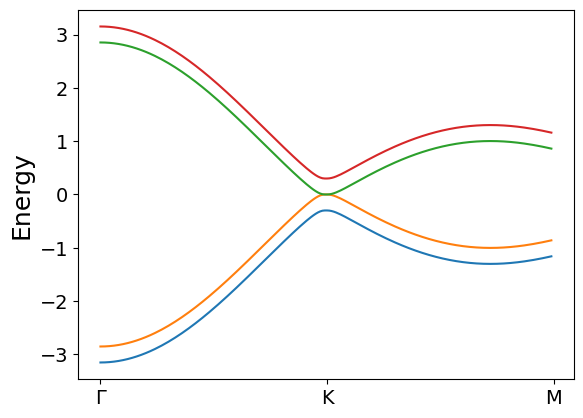

In [7]:
kx1 = np.linspace(0,4/3*np.pi, 100)
ky1 = np.zeros(100)
kx2 = np.linspace(4/3*np.pi,np.pi, 100)
ky2 = np.linspace(0,np.pi, 100)

kx = np.concatenate([kx1, kx2])
ky = np.concatenate([ky1, ky2])
band_0 = []
band_1 = []
band_2 = []
band_3 = []

for x, y in zip(kx, ky):
    mat_H = calc_H_BG(x,y,0, 0)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    band_0.append(energy[0])
    band_1.append(energy[1])
    band_2.append(energy[2])
    band_3.append(energy[3])

plt.plot(band_0)
plt.plot(band_1)
plt.plot(band_2)
plt.plot(band_3)
plt.ylabel("Energy", fontsize = 18)
plt.xticks([0, 100, 200], ["Γ", "K", "M"], fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

Add electric potential

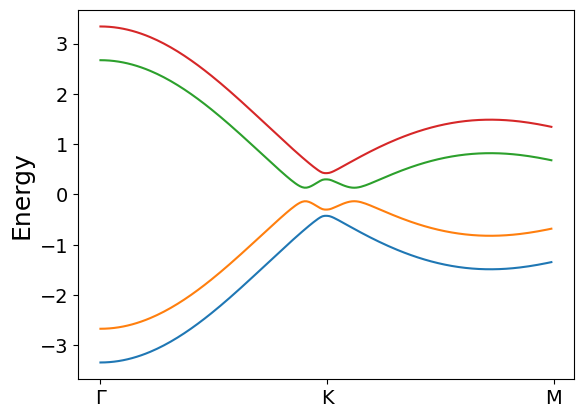

In [8]:
E = 0.3

kx1 = np.linspace(0,4/3*np.pi, 100)
ky1 = np.zeros(100)
kx2 = np.linspace(4/3*np.pi,np.pi, 100)
ky2 = np.linspace(0,np.pi, 100)

kx = np.concatenate([kx1, kx2])
ky = np.concatenate([ky1, ky2])
band_0 = []
band_1 = []
band_2 = []
band_3 = []

for x, y in zip(kx, ky):
    mat_H = calc_H_BG(x,y,0, E)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    band_0.append(energy[0])
    band_1.append(energy[1])
    band_2.append(energy[2])
    band_3.append(energy[3])

plt.plot(band_0)
plt.plot(band_1)
plt.plot(band_2)
plt.plot(band_3)
plt.ylabel("Energy", fontsize = 18)
plt.xticks([0, 100, 200], ["Γ", "K", "M"], fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

## 5. AB assymmetric model

In [10]:
def calc_H_asG(kx,ky,μ):
    N = 2
    mat_Htb = np.zeros((N,N), dtype=complex)   
    mat_Htb[0,0] = -μ
    mat_Htb[1,1] = μ
    t = -1.0
    c = np.sqrt(3)/2
 
    for a in (0, 1):
        if a == 0:
            b = 1
        else:
            b = 0
        ii = a
        jj = b
        if a == 0:
            mat_Htb[ii,jj] = t+t*np.exp(complex(0, -kx))+t*np.exp(complex(0,-ky*c))*np.exp(complex(0,-kx/2))                    
        elif a ==1:
            mat_Htb[ii,jj] = t+t*np.exp(complex(0, kx))+t*np.exp(complex(0, ky*c))*np.exp(complex(0,kx/2))
    return mat_Htb


C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


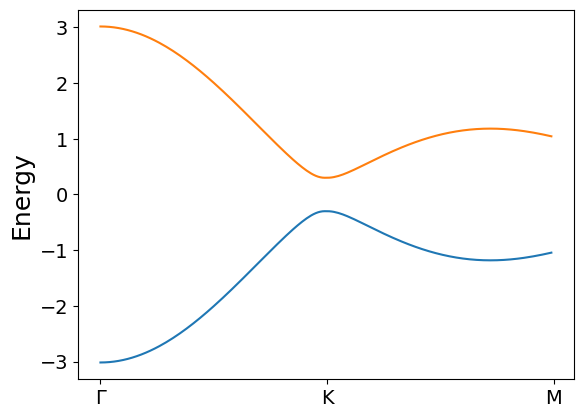

In [12]:
kx1 = np.linspace(0,4/3*np.pi, 100)
ky1 = np.zeros(100)
kx2 = np.linspace(4/3*np.pi,np.pi, 100)
ky2 = np.linspace(0,np.pi, 100)

kx = np.concatenate([kx1, kx2])
ky = np.concatenate([ky1, ky2])
band_0 = []
band_1 = []


for x, y in zip(kx, ky):
    mat_H = calc_H_asG(x,y,0.3)
    energy, mat_v  = np.linalg.eig(mat_H)
    ind = np.argsort(energy)
    energy = energy[ind]
    band_0.append(energy[0])
    band_1.append(energy[1])

plt.plot(band_0)
plt.plot(band_1)

plt.ylabel("Energy", fontsize = 18)
plt.xticks([0, 100, 200], ["Γ", "K", "M"], fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()